Libraries

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import math

Dataset

In [188]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])
w = 200
b = -100

FInding Function f_wb
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b $$

In [189]:
def fxn(x, w, b):

    f_wb = np.dot(x, w)+b
    return f_wb

Finding Cost Function

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [190]:
def cost_fxn(x, y, w, b):

    m = x.shape[0]
    y_ = fxn(x, w, b)
    cost = np.sum((y_ - y)**2)/(2*m)

    return cost

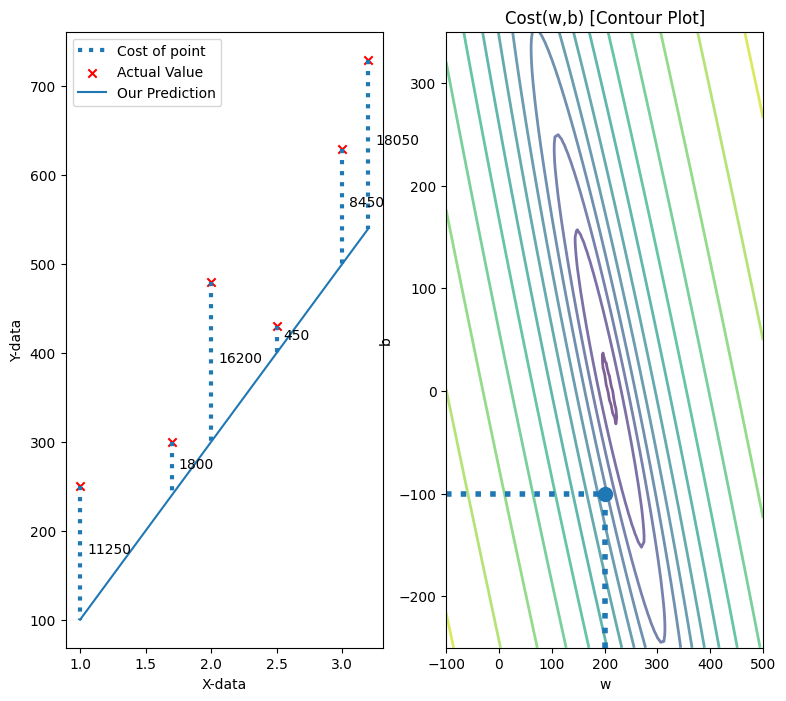

In [191]:
def plt_house_x(X, y,f_wb=None, ax=None):
    if not ax:
        fig, ax = plt.subplots(1,1)
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")
    ax.set_ylabel("Y-data")
    ax.set_xlabel("X-data")
    if f_wb is not None:
        ax.plot(X, f_wb,label="Our Prediction")
    ax.legend()

def mk_cost_lines(x, y, w, b, ax):
    label = 'Cost of point'
    addedbreak = False
    for p in zip(x, y):
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1], f_wb_p, lw=3, ls='dotted', label=label)
        label = ''  # just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',
                    xytext=(5, 0), textcoords='offset points')

def plt_stationary(x_train, y_train):

    fig = plt.figure(figsize=(9, 8))
    fig.set_facecolor('#ffffff')
    fig.canvas.toolbar_position = 'top'
    gs = GridSpec(1, 2, figure=fig)
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1])
    ax = np.array([ax0, ax1])

    # setup useful ranges and common linspaces
    w_range = np.array([200-300., 200+300])
    b_range = np.array([50-300., 50+300])
    b_space = np.linspace(*b_range, 100)
    w_space = np.linspace(*w_range, 100)

    # get cost for w,b ranges for contour and 3D
    tmp_b, tmp_w = np.meshgrid(b_space, w_space)
    z = np.zeros_like(tmp_b)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            z[i, j] = cost_fxn(x_train, y_train, tmp_w[i][j], tmp_b[i][j])
            if z[i, j] == 0:
                z[i, j] = 1e-6

    w0 = 200
    b = -100  # initial point
    ### plot model w cost ###
    f_wb = np.dot(x_train, w0) + b
    mk_cost_lines(x_train, y_train, w0, b, ax[0])
    plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])

    ### plot contour ###
    CS = ax[1].contour(tmp_w, tmp_b, np.log(z), levels=12,
                       linewidths=2, alpha=0.7)
    ax[1].set_title('Cost(w,b) [Contour Plot]')
    ax[1].set_xlabel('w', fontsize=10)
    ax[1].set_ylabel('b', fontsize=10)
    ax[1].set_xlim(w_range)
    ax[1].set_ylim(b_range)
    cscat = ax[1].scatter(w0, b, s=100,
                          zorder=10, label="cost with \ncurrent w,b")
    chline = ax[1].hlines(b, ax[1].get_xlim()[0], w0,
                          lw=4, ls='dotted')
    cvline = ax[1].vlines(w0, ax[1].get_ylim()[0], b,
                          lw=4, ls='dotted')


    return fig, ax, [cscat, chline, cvline]


fig, ax, dyn_items = plt_stationary(x_train, y_train)

Finding dJ/dw and dJ/db

$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \\
$$


In [192]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    m = x.shape[0]
    a = fxn(x, w, b) -y
    dj_dw = np.sum((np.dot(a, x)))/m
    dj_db = np.sum(a)/m
    return dj_dw, dj_db


Gradient Descent

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

In [193]:
def gradient_descent(x, y, w, b, alpha, num_iters):
    J_history = []
    p_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        b -= alpha * dj_db
        w -= alpha * dj_dw
        J_history.append(cost_fxn(x, y, w, b))
        p_history.append([w, b])
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(
    x_train, y_train, w_init, b_init, tmp_alpha, iterations)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")


f_wb = fxn(x_train, w_final, b_final)
print("Cost is", cost_fxn(x_train, y_train, w_final, b_final))



Iteration    0: Cost 1.09e+05  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  1.170e+01, b: 4.70000e+00
Iteration 1000: Cost 1.78e+03  dj_dw: -1.060e+00, dj_db:  2.599e+00   w:  1.974e+02, b: 3.16325e+01
Iteration 2000: Cost 1.74e+03  dj_dw: -4.357e-01, dj_db:  1.068e+00   w:  2.045e+02, b: 1.44256e+01
Iteration 3000: Cost 1.74e+03  dj_dw: -1.790e-01, dj_db:  4.388e-01   w:  2.074e+02, b: 7.35495e+00
Iteration 4000: Cost 1.74e+03  dj_dw: -7.357e-02, dj_db:  1.803e-01   w:  2.085e+02, b: 4.44950e+00
Iteration 5000: Cost 1.74e+03  dj_dw: -3.023e-02, dj_db:  7.410e-02   w:  2.090e+02, b: 3.25559e+00
Iteration 6000: Cost 1.74e+03  dj_dw: -1.242e-02, dj_db:  3.045e-02   w:  2.092e+02, b: 2.76500e+00
Iteration 7000: Cost 1.74e+03  dj_dw: -5.104e-03, dj_db:  1.251e-02   w:  2.093e+02, b: 2.56340e+00
Iteration 8000: Cost 1.74e+03  dj_dw: -2.097e-03, dj_db:  5.141e-03   w:  2.093e+02, b: 2.48056e+00
Iteration 9000: Cost 1.74e+03  dj_dw: -8.619e-04, dj_db:  2.113e-03   w:  2.094e+02, b: 2.44652e+00
